# Product comparison

![header](../figures/logos_partenaires_DC_WOC-ESA.jpg)


***
**Authors:** Datlas <br>
**Copyright:** 2023 Datlas <br>
**License:** MIT

<br>

<br>


<div class="alert alert-block alert-success">
<h1><center> <u> Mediterranean results </u> </center></h1>  
</div>


<div class="alert alert-block alert-success"> 
 <h5><center> The notebook aims to evaluate the surface current for all products in the Mediterranean region.</center></h5> 
</div>

## <u> Compared products </u> 

<h3>
    <ul>  
        <li> GlobCurrent Geostrophic REP </li>  
        <li> WOC BFN-QG </li>
        <li> WOC inertial global </li>
        <li> WOC dADR-SR (dADR Med) </li>
    </ul>  

</h3>

In [1]:
from glob import glob
import numpy as np
import os
import sys 
sys.path.append('../')
import warnings
import datetime
warnings.filterwarnings("ignore") 

In [2]:
import velocity_metrics.spectrum.spectrum as spectrum
import velocity_metrics.lagrangian.drifters as drifters
import velocity_metrics.utils.constant as const 
import velocity_metrics.eulerian.eulerian_drifters as eulerian 
import velocity_metrics.lagrangian.cumulative_distance as sde
import velocity_metrics.fronts.compare_fronts_vel as compare_fronts_vel
import velocity_metrics.fronts.box_metrics as box_metrics

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [3]:
from src import utils

In [4]:

outputdir = '../results/'


<br>

<br>

## <u> 1. Spectrum </u> 

In [5]:
dir_spectrum = '../dc_data/DC_product_evaluation/spectrum/'


<br>

<h2>At 0m</h2>

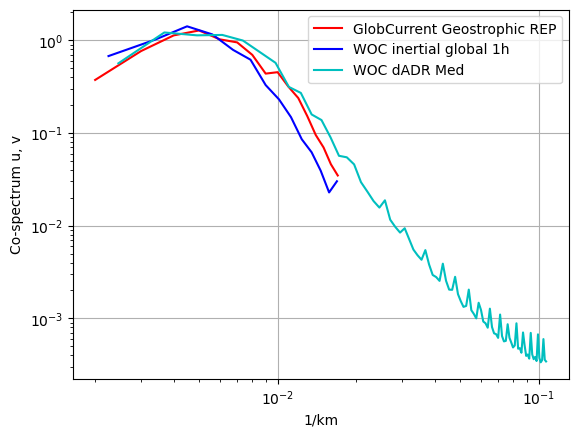

In [6]:
name_plot = 'Spectrum_Mediterranean_0.png'

list_spectrum_pickles = [dir_spectrum+'spectrum_008_047_region_Mediterranean_0.pyo', 
                         dir_spectrum+'spectrum_woc-l4-cureul-glob-1h_region_Mediterranean_0.pyo',
                         dir_spectrum+'spectrum_woc-l4-dadr-med-1d_region_Mediterranean_0.pyo',]

_ = spectrum.plot(list_spectrum_pickles,
                      outfile=outputdir+name_plot,
                      list_color=['r','b','c'])

<br>


<h2>At 15m</h2>

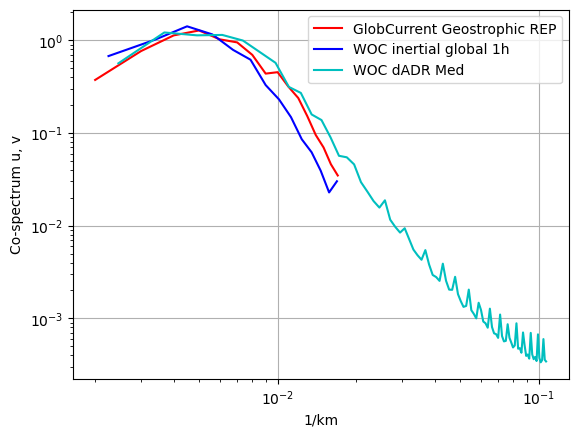

In [7]:
name_plot = 'Spectrum_Mediterranean_1.png'

list_spectrum_pickles = [dir_spectrum+'spectrum_008_047_region_Mediterranean_1.pyo', 
                         dir_spectrum+'spectrum_woc-l4-cureul-glob-1h_region_Mediterranean_1.pyo',
                         dir_spectrum+'spectrum_woc-l4-dadr-med-1d_region_Mediterranean_1.pyo',]

_ = spectrum.plot(list_spectrum_pickles,
                      outfile=outputdir+name_plot,
                      list_color=['r','b','c'])

<br>

<br>

## <u> 2. Eulerian RMS </u>

<br>

<h2>At 0m</h2>

<br>

<h3>Mean error</h3>

In [8]:
dir_eulerian = '../dc_data/DC_product_evaluation/eulerian_rms/'

In [9]:

list_dict = [{'type_stat':'Mean','path':dir_eulerian+'eulerian_rms_Mediterranean_008_047_00/Eulerian_RMS_008_047.pyo','name':'GlobCurrent Geostrophic'}, 
             {'type_stat':'Mean','path':dir_eulerian+'eulerian_rms_Mediterranean_woc-l4-cureul-glob-1h_00/Eulerian_RMS_woc-l4-cureul-glob-1h.pyo','name':'WOC inertial global 1h'},
             {'type_stat':'Mean','path':dir_eulerian+'eulerian_rms_Mediterranean_woc-l4-dadr-med-1d_00/Eulerian_RMS_woc-l4-dadr-med-1d.pyo','name':'WOC dADR-SR'}] 

utils.DictTable(list_dict)  

Mean,Norm Quadratic Error (%),Norm Explained Variance (%),Norm Correlation,Norm RMSD,Number of Points
GlobCurrent Geostrophic,55.482,56.379,0.541,0.194,13721.000
WOC inertial global 1h,50.868,53.370,0.615,0.180,14100.000
WOC dADR-SR,54.258,66.912,0.518,0.191,13951.000


<br>

<br>

<h3>Standard deviation error</h3>

In [10]:

list_dict = [{'type_stat':'STD','path':dir_eulerian+'eulerian_rms_Mediterranean_008_047_00/Eulerian_STD_008_047.pyo','name':'GlobCurrent Geostrophic'},
             {'type_stat':'STD','path':dir_eulerian+'eulerian_rms_Mediterranean_woc-l4-cureul-glob-1h_00/Eulerian_STD_woc-l4-cureul-glob-1h.pyo','name':'WOC inertial global 1h'},
             {'type_stat':'STD','path':dir_eulerian+'eulerian_rms_Mediterranean_woc-l4-dadr-med-1d_00/Eulerian_STD_woc-l4-dadr-med-1d.pyo','name':'WOC dADR-SR'}] 

utils.DictTable(list_dict,['Direction difference', 'Number of Points'])  

STD,Direction difference,Number of Points
GlobCurrent Geostrophic,44.383,13721.000
WOC inertial global 1h,44.461,14100.000
WOC dADR-SR,47.691,13951.000


<br>

<h2>At 15m</h2>

<br>

<h3>Mean error</h3>

In [11]:

list_dict = [{'type_stat':'Mean','path':dir_eulerian+'eulerian_rms_Mediterranean_008_047_15/Eulerian_RMS_008_047.pyo','name':'GlobCurrent Geostrophic'}, 
             {'type_stat':'Mean','path':dir_eulerian+'eulerian_rms_Mediterranean_woc-l4-cureul-glob-1h_15/Eulerian_RMS_woc-l4-cureul-glob-1h.pyo','name':'WOC inertial global 1h'},
             {'type_stat':'Mean','path':dir_eulerian+'eulerian_rms_Mediterranean_woc-l4-dadr-med-1d_15/Eulerian_RMS_woc-l4-dadr-med-1d.pyo','name':'WOC dADR-SR'}] 

utils.DictTable(list_dict)  

Mean,Norm Quadratic Error (%),Norm Explained Variance (%),Norm Correlation,Norm RMSD,Number of Points
GlobCurrent Geostrophic,56.225,57.278,0.498,0.191,49776.000
WOC inertial global 1h,53.076,51.053,0.536,0.181,50604.000
WOC dADR-SR,55.884,73.336,0.499,0.190,50959.000


<br>

<br>

<h3>Standard deviation error</h3>

In [12]:

list_dict = [{'type_stat':'STD','path':dir_eulerian+'eulerian_rms_Mediterranean_008_047_15/Eulerian_STD_008_047.pyo','name':'GlobCurrent Geostrophic'}, 
             {'type_stat':'STD','path':dir_eulerian+'eulerian_rms_Mediterranean_woc-l4-cureul-glob-1h_15/Eulerian_STD_woc-l4-cureul-glob-1h.pyo','name':'WOC inertial global 1h'},
             {'type_stat':'STD','path':dir_eulerian+'eulerian_rms_Mediterranean_woc-l4-dadr-med-1d_15/Eulerian_STD_woc-l4-dadr-med-1d.pyo','name':'WOC dADR-SR'}] 

utils.DictTable(list_dict,['Direction difference', 'Number of Points'])  

STD,Direction difference,Number of Points
GlobCurrent Geostrophic,41.229,49776.000
WOC inertial global 1h,41.756,50604.000
WOC dADR-SR,45.643,50959.000


<br>

<br>

## <u> 3. Lagrangian Cumulative Distance</u>

In [13]:
dir_sde = '../dc_data/DC_product_evaluation/cumulative_distance/'

<br>

<h2>At 0m</h2>

<Figure size 640x480 with 0 Axes>

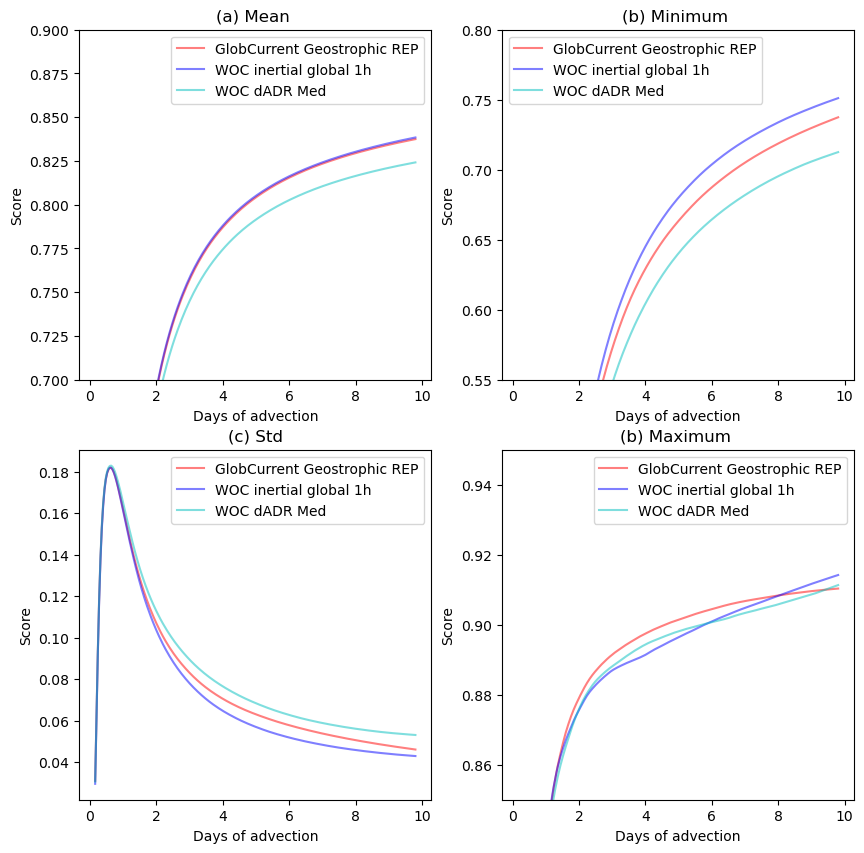

In [14]:


all_outputfilename = ['Mediterranean_008_047_00/Sde_008_047_15m.pyo.gz',
                      'Mediterranean_woc-l4-cureul-glob-1h_00/Sde_woc-l4-cureul-glob-1h_15m.pyo.gz',
                      'Mediterranean_woc-l4-dadr-med-1d_00/Sde_woc-l4-dadr-med-1d_00m.pyo.gz',]

list_sde = [dir_sde + output_filename for output_filename in all_outputfilename]

outputfilename = 'SDE_region_Mediterranean_00m.png'

_ = sde.plot(list_sde, output_dir=outputdir, 
             output_filename=outputfilename,
             list_color=['r','b','c','g'],
             plot_range={'mean': (0.7, 0.9), 'max': (0.85, 0.95), 'min': (0.55, 0.8)})

<br>

<h2>At 15m</h2>

<Figure size 640x480 with 0 Axes>

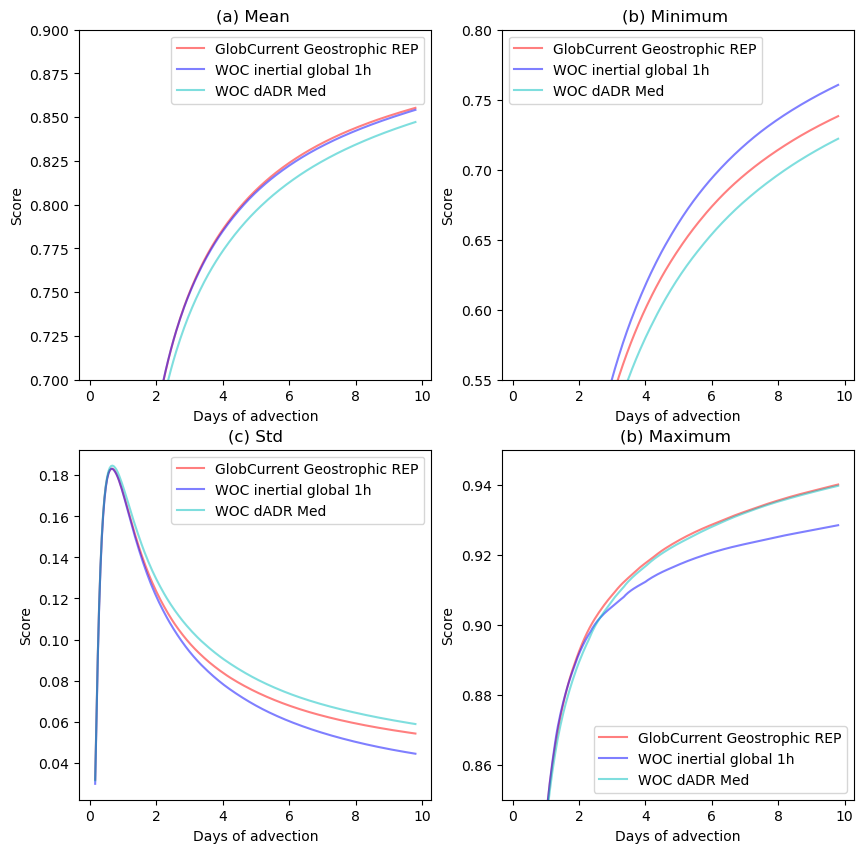

In [15]:
 

all_outputfilename = ['Mediterranean_008_047_15/Sde_008_047_15m.pyo.gz',
                      'Mediterranean_woc-l4-cureul-glob-1h_15/Sde_woc-l4-cureul-glob-1h_15m.pyo.gz',
                      'Mediterranean_woc-l4-dadr-med-1d_15/Sde_woc-l4-dadr-med-1d_00m.pyo.gz',]

list_sde = [dir_sde + output_filename for output_filename in all_outputfilename]

outputfilename = 'SDE_region_Mediterranean_15m.png'

_ = sde.plot(list_sde, output_dir=outputdir, 
             output_filename=outputfilename,
             list_color=['r','b','c','g'],
             plot_range={'mean': (0.7, 0.9), 'max': (0.85, 0.95), 'min': (0.55, 0.8)})

In [16]:
# Save results as a markdown file

! jupyter nbconvert --output-dir='../results'  nb_wocproducts_Mediterranean.ipynb --TagRemovePreprocessor.enabled=True --TagRemovePreprocessor.remove_cell_tags="['remove_cell', 'other_tag_to_remove']" --to markdown --no-input --no-prompt


[NbConvertApp] Converting notebook nb_wocproducts_Mediterranean.ipynb to markdown
[NbConvertApp] Support files will be in nb_wocproducts_Mediterranean_files/
[NbConvertApp] Making directory ../results/nb_wocproducts_Mediterranean_files
[NbConvertApp] Making directory ../results/nb_wocproducts_Mediterranean_files
[NbConvertApp] Making directory ../results/nb_wocproducts_Mediterranean_files
[NbConvertApp] Making directory ../results/nb_wocproducts_Mediterranean_files
[NbConvertApp] Writing 3334 bytes to ../results/nb_wocproducts_Mediterranean.md
